In [21]:
!pip install unrar

In [22]:
!sudo apt-get install unrar --y
!unrar x imageOriginal.rar

E: Command line option --y is not understood in combination with the other options

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from imageOriginal.rar

Creating    imageOriginal                                             OK
Creating    imageOriginal/test                                        OK
Creating    imageOriginal/test/ball                                   OK
Extracting  imageOriginal/test/ball/Tennis_4.jpg                         0  OK 
Extracting  imageOriginal/test/ball/volleyball_1.jpg                     0  OK 
Extracting  imageOriginal/test/ball/volleyball_4.jpg                     0  OK 
Extracting  imageOriginal/test/ball/volleyball_5.jpg                     0  OK 
Extracting  imageOriginal/test/ball/volleyball_6.jpg                     0  OK 
Creating    imageOriginal/test/baseball bat                           OK
Extracting  imageOriginal/test/baseball bat/img_659142598_.jpg           0  OK 
Extracting  imageOriginal/test/baseball b

In [68]:
!pip install keras
!pip install tensorflow
!pip install scikit-learn
!pip install seaborn



In [71]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tensorflow.keras.applications import VGG16


['racket', 'baseballGloves', 'bowling bin', 't-shirt', 'baseball bat', 'Dumbbell', 'BoxingGloves', 'sport shoes', 'Football Helmets', 'ball', 'whistle']


/tmp/ipykernel_368/1414598294.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array(x_train)
/tmp/ipykernel_368/1414598294.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test = np.array(x_test)
/tmp/ipykernel_368/1414598294.py:99: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_val = np.array(x_val)


Total time is : 2.2488903999328613
########################################## Class Number :  0  ##########################################


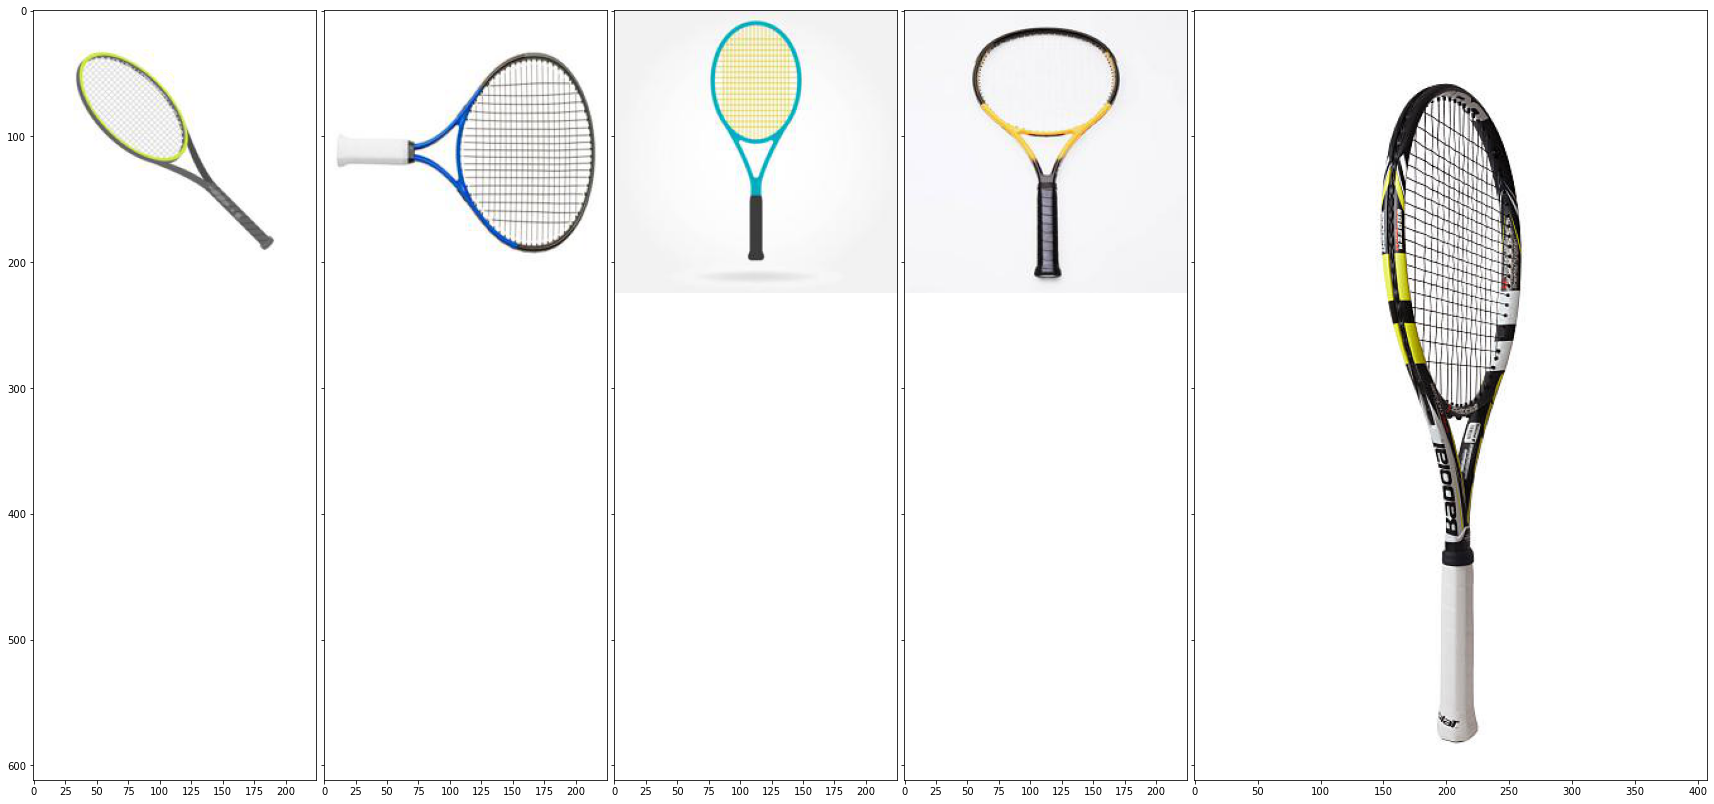

########################################## Class Number :  1  ##########################################


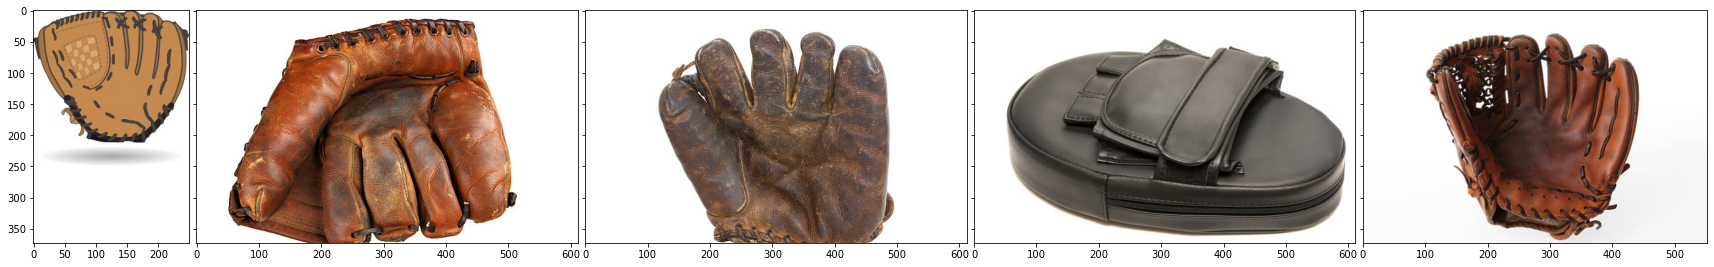

########################################## Class Number :  2  ##########################################


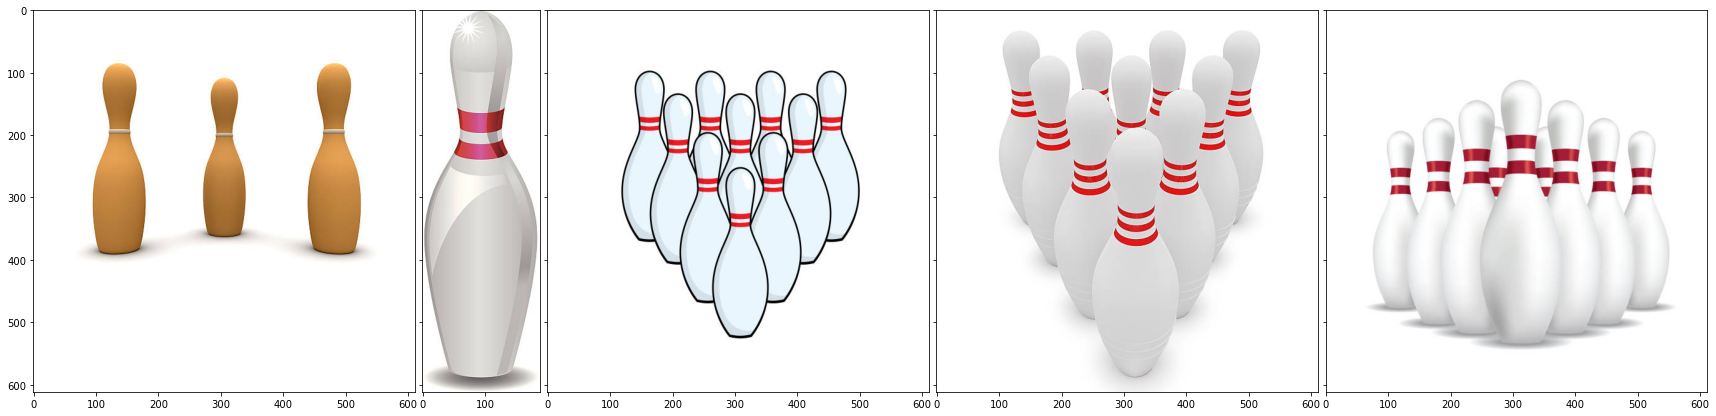

########################################## Class Number :  3  ##########################################


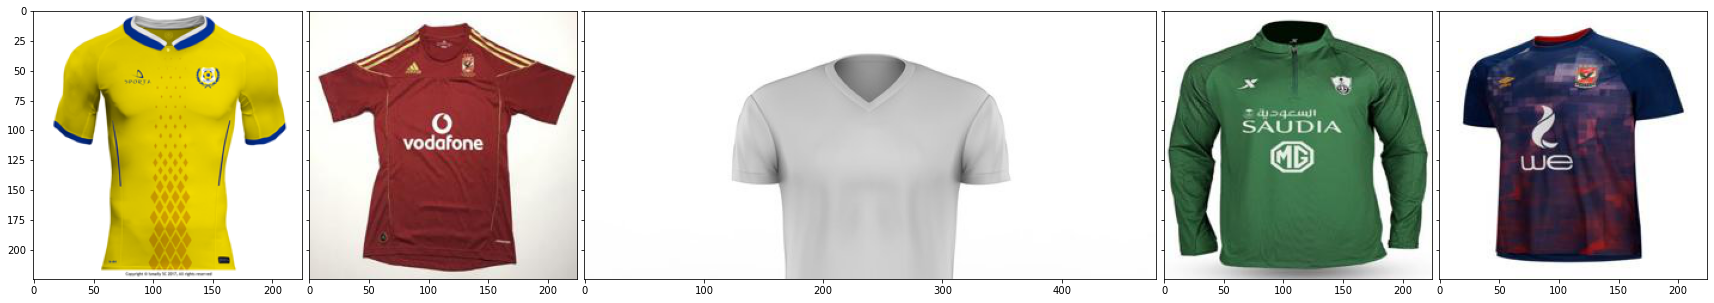

########################################## Class Number :  4  ##########################################


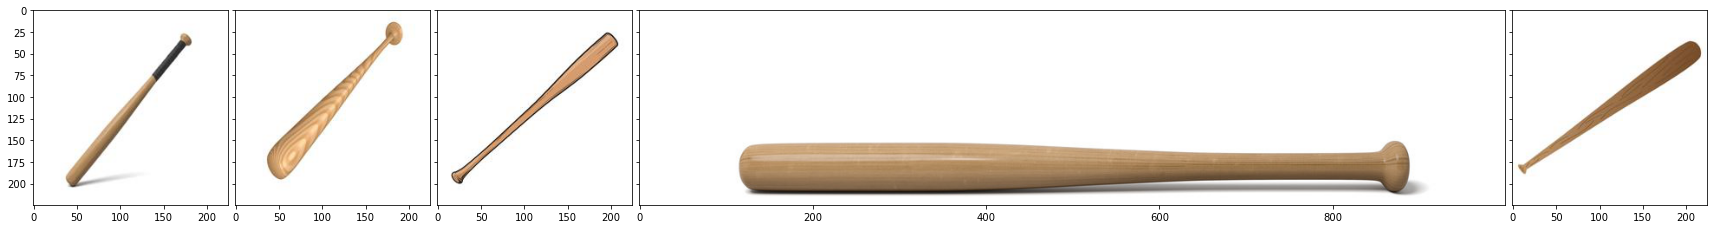

########################################## Class Number :  5  ##########################################


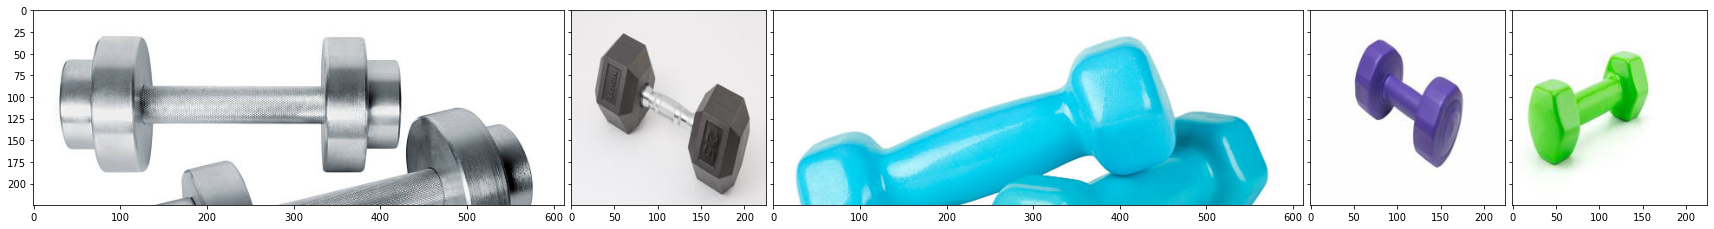

########################################## Class Number :  6  ##########################################


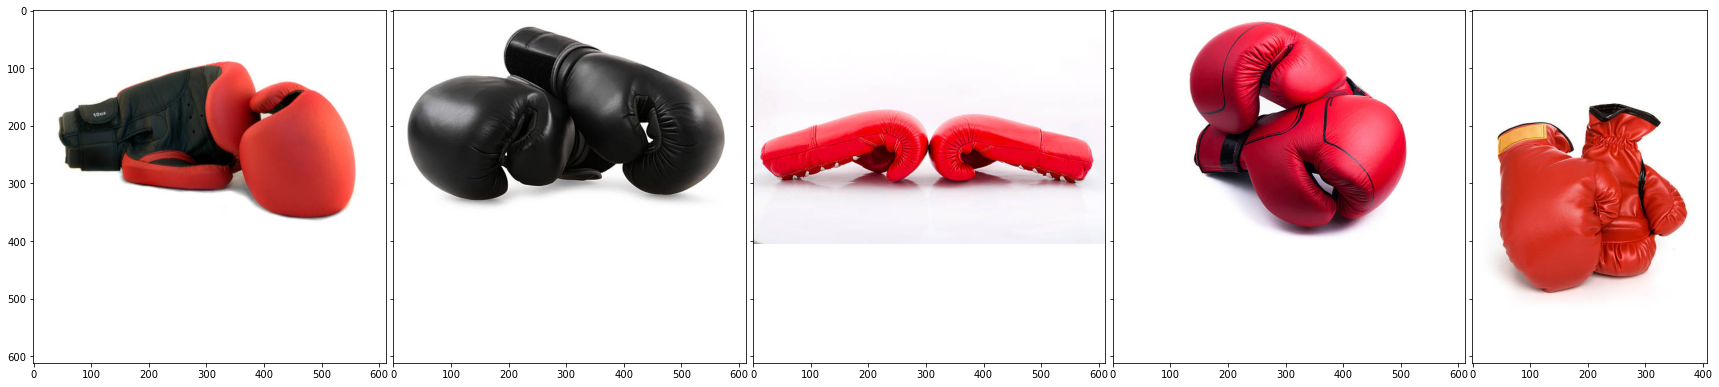

########################################## Class Number :  7  ##########################################


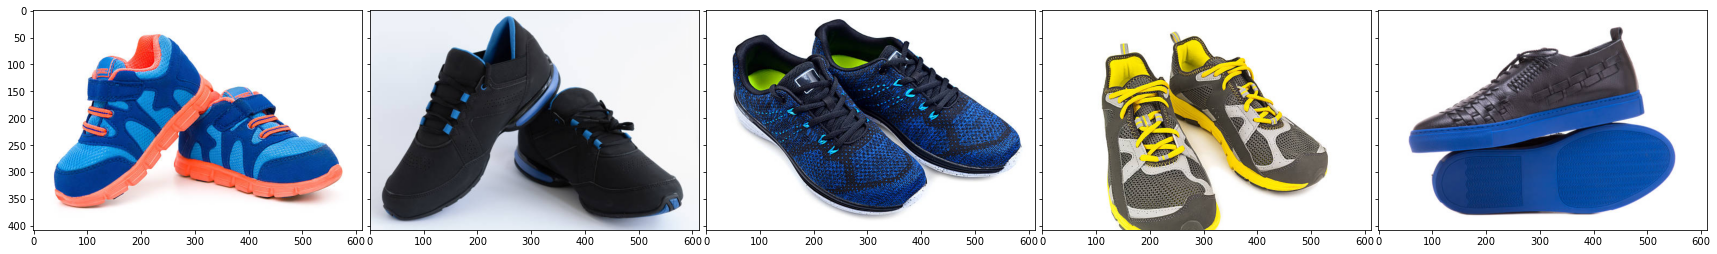

########################################## Class Number :  8  ##########################################


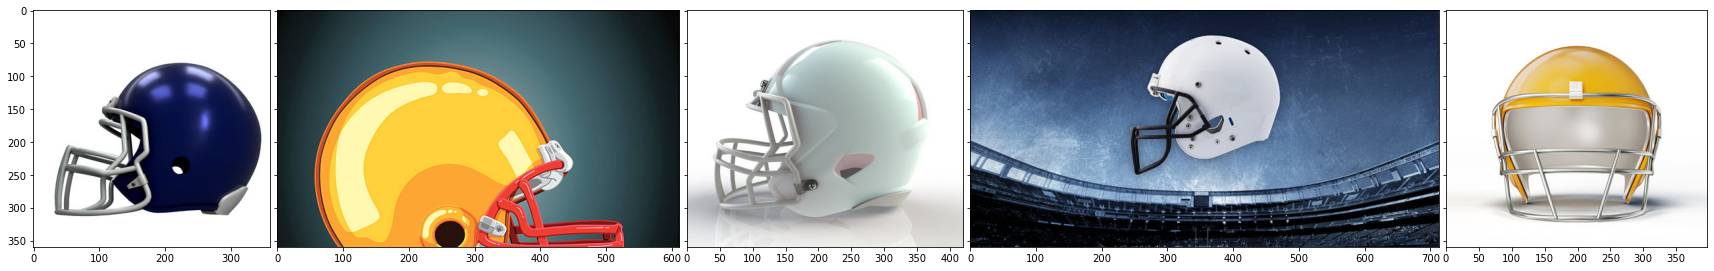

########################################## Class Number :  9  ##########################################


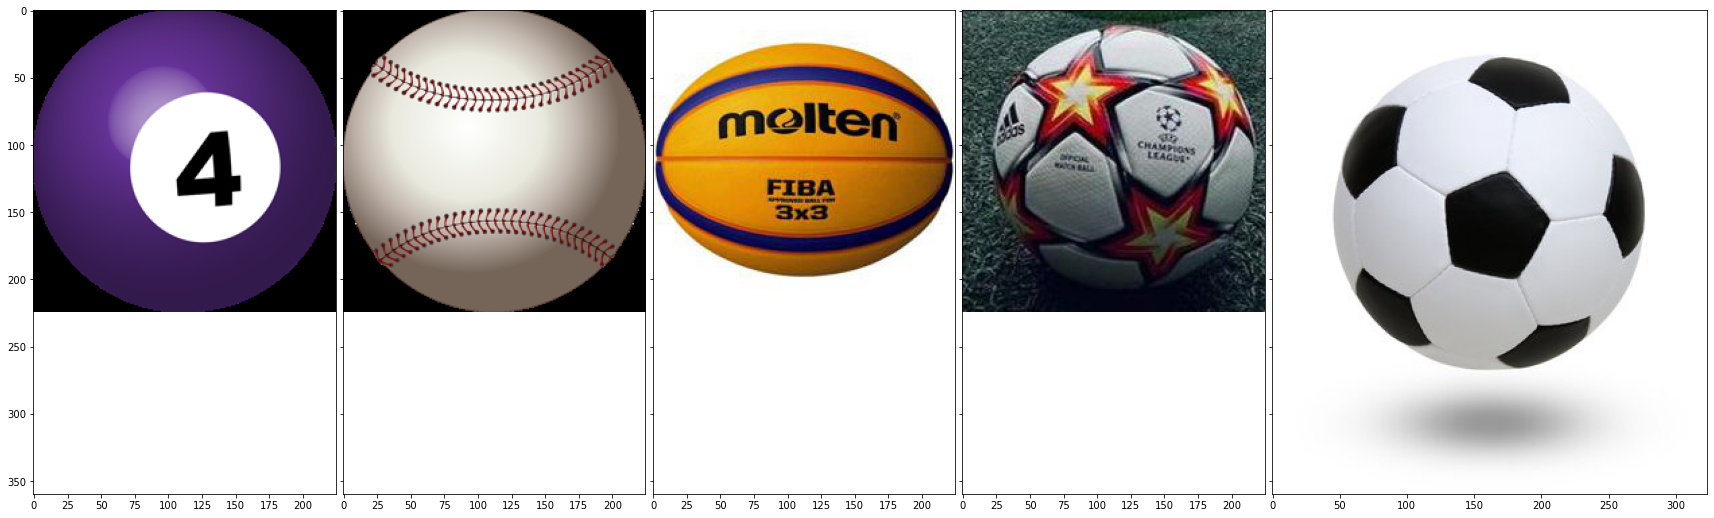

########################################## Class Number :  10  ##########################################


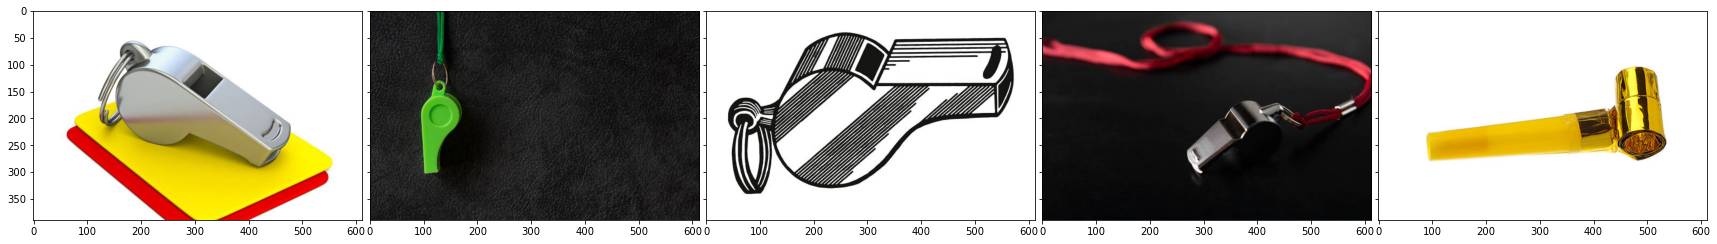

Total time is : 8.041102886199951


In [30]:
# Prepare your dataset here
# importing the required libraries
import os
import cv2
import time
import keras
import numpy as np
import pandas as pd
from keras.models import Model
import matplotlib.pyplot as plt
from keras.layers import Dropout, InputLayer
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.layers import Input, Dense, Flatten
from keras.applications.resnet import ResNet101
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D

def draw_func(list_of_imgs):
  try:
    fig = plt.figure(figsize=(30, 30))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 5), axes_pad=0.1)
    for ax, im in zip(grid, list_of_imgs):
      ax.imshow(im)
  except:
    pass
  plt.show()

def Plot(X,Y,Label,Color, Marker , S , Xlabel , Ylabel , Title):
  plt.plot(X, Y, label = Label, c = Color)
  plt.scatter(X,Y, c=Color, marker = Marker , s=S)
  plt.xlabel(Xlabel)
  plt.ylabel(Ylabel)
  plt.title(Title)
  plt.legend()
  # plt.show()
  return plt

############################################################################### Q1
path_train = r'imageOriginal/train'
path_test = r'imageOriginal/test'
path_val = r'imageOriginal/validate'

print(os.listdir(path_train))

start = time.time()
folders_names = os.listdir(path_train)

images_names_train = []
images_names_test = []
images_names_val = []

x_train = []
x_test = []
x_val = []

for i in range(len(folders_names)):
    images_names_train.append(os.listdir(path_train+'//'+folders_names[i]))
    images_names_test.append(os.listdir(path_test+'//'+folders_names[i]))
    images_names_val.append(os.listdir(path_val+'//'+folders_names[i]))
    
for i in range(len(folders_names)):
    for j in range(len(images_names_train[i])):
        img = cv2.imread(path_train+'//'+folders_names[i]+'//'+ images_names_train[i][j])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x_train.append(img)

for i in range(len(folders_names)):
    for j in range(len(images_names_test[i])):
        img = cv2.imread(path_test+'//'+folders_names[i]+'//'+ images_names_test[i][j])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x_test.append(img)

for i in range(len(folders_names)):
    for j in range(len(images_names_val[i])):
        img = cv2.imread(path_val+'//'+folders_names[i]+'//'+ images_names_val[i][j])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x_val.append(img)

        
y_train = []
y_test = []
y_val = []

for i in range(len(folders_names)):
    for j in range(len(images_names_train[i])):
        y_train.append(i)

for i in range(len(folders_names)):
    for j in range(len(images_names_test[i])):
        y_test.append(i)
    
for i in range(len(folders_names)):
    for j in range(len(images_names_val[i])):
        y_val.append(i)
    
x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

stop = time.time()
print("Total time is :", stop - start)


############################################################################### Display 5 images from each class
start_time = time.time()
start = 0
end = 5
for i in range(11):
    print("########################################## Class Number : ", i, " ##########################################")
    # function to plot the images in grid 
    draw_func(x_train[start:end])
    start = start + 40
    end = end + 40
stop_time = time.time()
print("Total time is :", stop_time - start_time)

In [31]:
print(len(images_names_train[0]))
print(len(images_names_test[0]))
print(len(images_names_val[0]))

40
5
5


In [32]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(440,)
(55,)
(55,)


In [33]:
print(x_train[400].shape)
print(x_train[0].shape)

(459, 612, 3)
(225, 225, 3)


In [34]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(440,)
(55,)
(55,)


In [35]:
y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [36]:
y_val

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10])

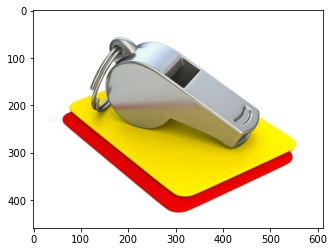

(440, 224, 224, 3)
(440,)


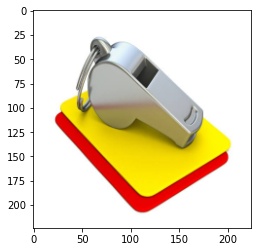

In [37]:
############################# images resizing (224,224,3)
plt.imshow(x_train[400])
plt.show()

resized_x_train = []
resized_x_test = []
resized_x_val = []

for i in range(len(x_train)):
    resized_x_train.append(cv2.resize(x_train[i], (224,224), interpolation = cv2.INTER_AREA))

for i in range(len(x_test)):
    resized_x_test.append(cv2.resize(x_test[i], (224,224), interpolation = cv2.INTER_AREA))
    
for i in range(len(x_val)):
    resized_x_val.append(cv2.resize(x_val[i], (224,224), interpolation = cv2.INTER_AREA))

resized_x_train = np.array(resized_x_train)
resized_x_test = np.array(resized_x_test)
resized_x_val = np.array(resized_x_val)

plt.imshow(resized_x_train[400])

print(resized_x_train.shape)
print(y_train.shape)

In [38]:
resized_x_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [39]:
y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [40]:
from sklearn.utils import shuffle
resized_x_train, y_train = shuffle(resized_x_train, y_train, random_state=42)
resized_x_test, y_test = shuffle(resized_x_test, y_test, random_state=42)
resized_x_val, y_val = shuffle(resized_x_val, y_val, random_state=42)

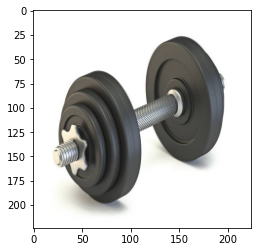

5


In [41]:
plt.imshow(resized_x_train[10])
plt.show()
print(y_train[10])

In [42]:
y_train

array([ 6,  1,  8,  6,  8,  7,  4,  2, 10, 10,  5,  1,  5,  9,  8,  1, 10,
        4,  1,  3,  0,  4,  0,  4,  2,  3,  1,  5, 10,  1,  7,  8,  3,  9,
        9,  1,  5,  2,  0,  5,  9,  3,  5,  1,  3,  0,  4,  7,  1,  9,  9,
        0,  3,  3,  0,  0,  7,  7,  1,  7,  3,  2,  7,  9,  7, 10,  0,  4,
       10,  2,  1,  9,  9,  6,  4,  3,  7,  0,  1,  2,  6,  2, 10,  1,  3,
        0,  0,  1,  6,  7,  0,  2,  7, 10,  2, 10, 10,  3,  9,  4,  7,  0,
        1, 10, 10,  9, 10,  0, 10,  2,  7,  0,  0,  9,  1,  8,  6,  1,  2,
        6,  5,  0,  3,  8,  6,  0,  0, 10,  9,  2,  8, 10,  2,  2, 10,  5,
        8,  8,  9,  4,  9,  3,  8,  5,  9, 10,  2,  9,  3,  5,  4,  4,  2,
        8,  4,  1, 10, 10,  2,  5,  6,  4,  6,  7,  4, 10,  8,  5,  0,  3,
        8,  6,  7,  9,  1,  2,  5,  5,  0,  7,  8,  3,  3,  4,  0,  6,  2,
        2,  6,  6,  4, 10, 10,  9,  9,  4,  4,  2,  5,  4,  9,  3,  0,  2,
        1,  7,  3,  8,  2,  3,  8,  9,  2,  8,  1,  0,  0,  3,  3,  6,  5,
        4,  1,  5,  8,  8

(440, 224, 224, 3)
(440,)
(128, 224, 224, 3)
(128,)
******************* Augmented images *******************


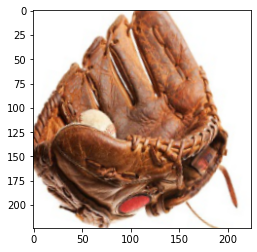

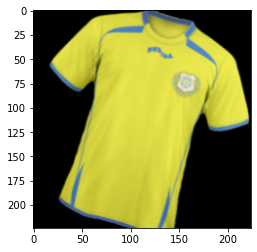

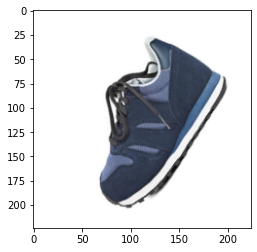

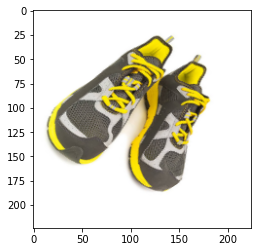

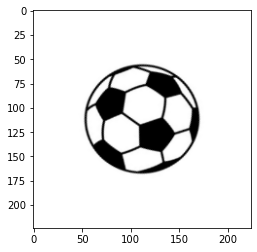

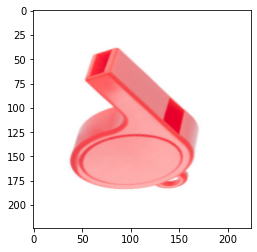

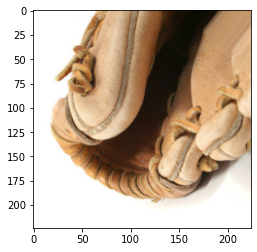

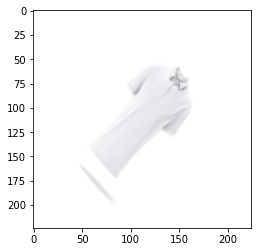

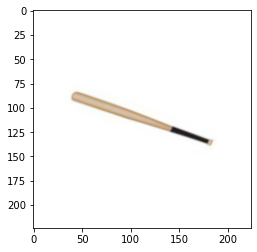

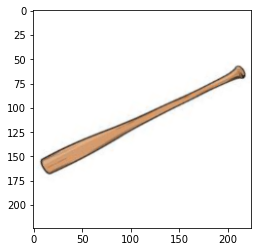

(568, 224, 224, 3)
(568,)
(128, 224, 224, 3)
(128,)
******************* Augmented images *******************


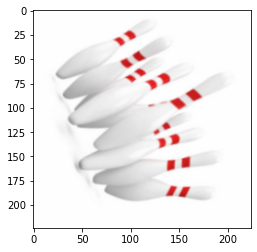

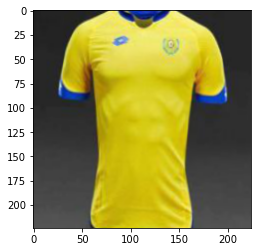

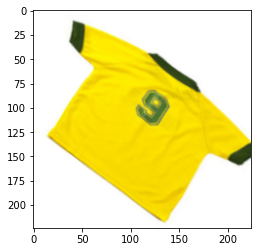

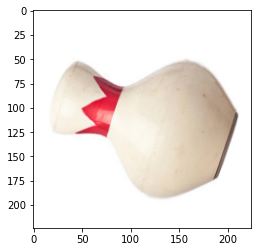

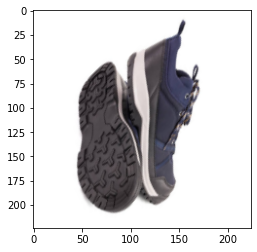

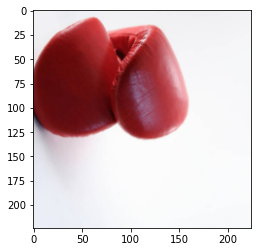

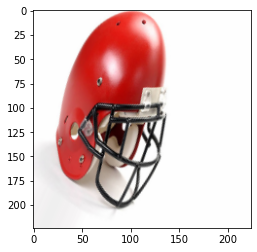

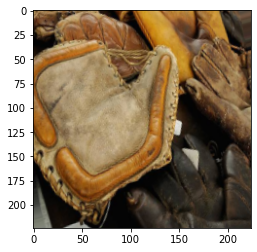

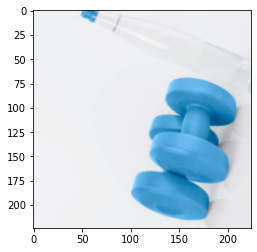

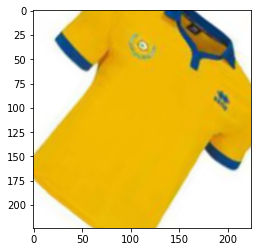

(696, 224, 224, 3)
(696,)
(128, 224, 224, 3)
(128,)
******************* Augmented images *******************


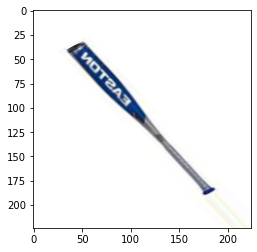

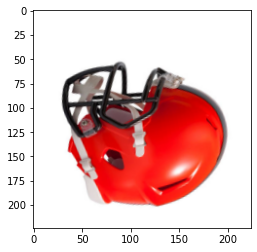

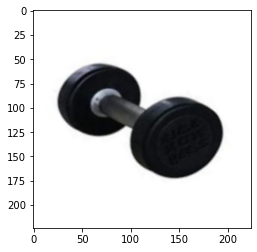

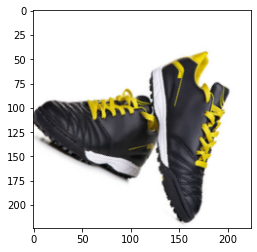

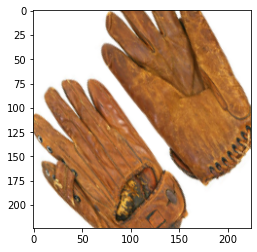

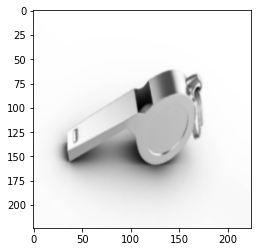

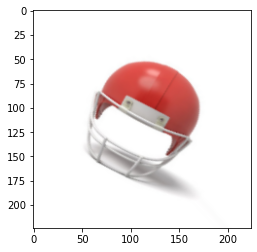

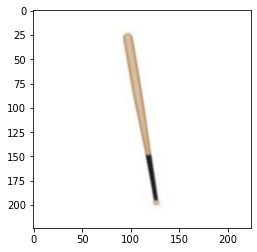

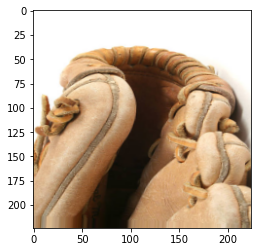

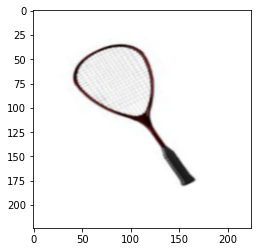

(824, 224, 224, 3)
(824,)
(128, 224, 224, 3)
(128,)
******************* Augmented images *******************


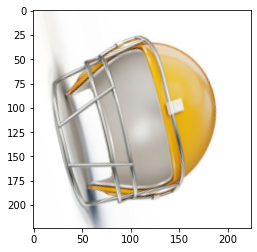

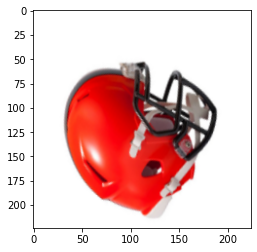

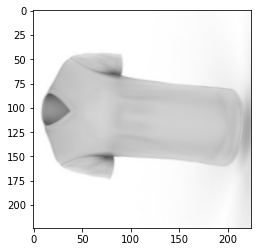

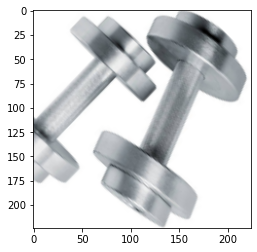

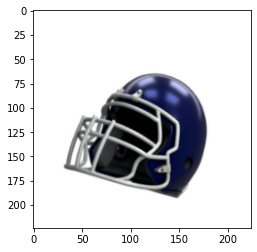

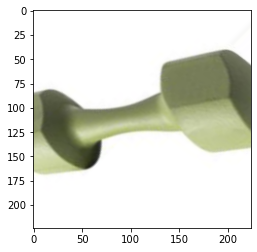

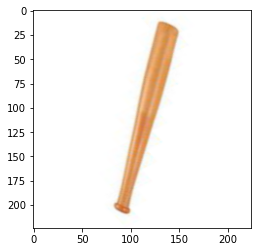

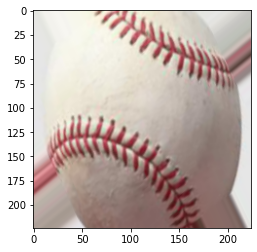

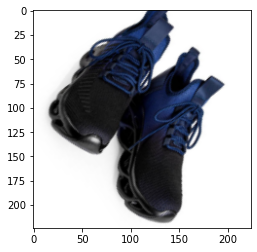

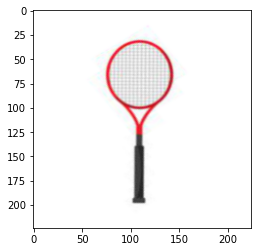

(952, 224, 224, 3)
(952,)
(128, 224, 224, 3)
(128,)
******************* Augmented images *******************


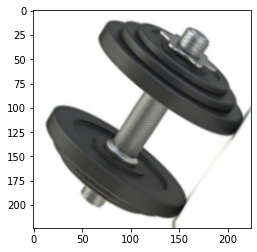

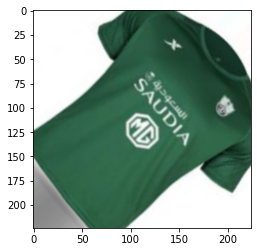

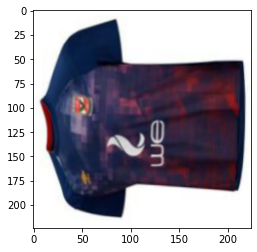

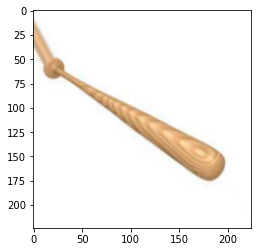

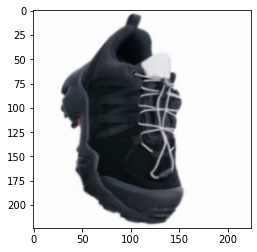

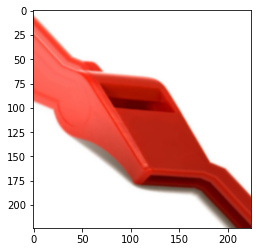

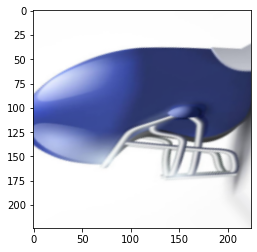

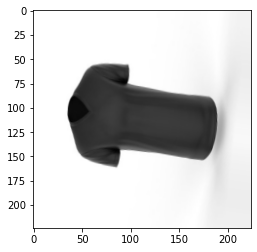

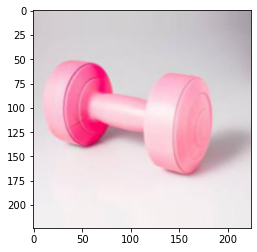

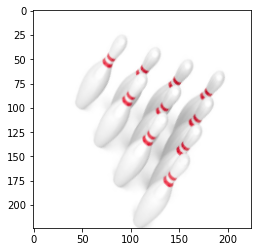

(1080, 224, 224, 3)
(1080,)


In [43]:
####################### Data Augmentation
Img_generator = ImageDataGenerator(rotation_range=90,shear_range=0.5, zoom_range=0.2, horizontal_flip=True)

print(resized_x_train.shape)
print(y_train.shape)

for i in range(5):
    iterator = Img_generator.flow(resized_x_train, y_train, batch_size=128)

    new_imgs_train = next(iterator)[0].astype("uint8")
    new_labels_train = next(iterator)[1].astype("uint8")

    print(new_imgs_train.shape)
    print(new_labels_train.shape)

    print("******************* Augmented images *******************")
    for i in range(10):
        plt.imshow(new_imgs_train[i])
        plt.show()

    resized_x_train = np.append(resized_x_train, new_imgs_train, axis = 0)
    y_train = np.append(y_train, new_labels_train, axis = 0)

    print(resized_x_train.shape)
    print(y_train.shape)

In [44]:
print(resized_x_train.shape)
print(y_train.shape)

print(resized_x_test.shape)
print(y_test.shape)

print(resized_x_val.shape)
print(y_val.shape)

(1080, 224, 224, 3)
(1080,)
(55, 224, 224, 3)
(55,)
(55, 224, 224, 3)
(55,)


In [72]:
def plot_confusion_matrix(data):
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
    sns.set(font_scale=1.6)
    
    ax = sns.heatmap(data, annot=True,fmt='g')
 
    # ax.set_xticklabels(labels)
    # ax.set_yticklabels(labels)
    # ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()

In [46]:
vgg_model = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3),classes=11, pooling="avg")
for layer in vgg_model.layers:
    layer.trainable = False

2022-11-15 18:25:34.451980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 18:25:34.532413: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-15 18:25:34.532445: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-15 18:25:34.533094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow bin

58889256/58889256 [==============================] - 2s 0us/step


In [47]:
model_vgg = keras.models.Sequential()
model_vgg.add(vgg_model)
model_vgg.add(Flatten())
model_vgg.add(Dense(2048, activation='relu'))
model_vgg.add(Dense(1024, activation='relu'))
model_vgg.add(Dense(512, activation='relu'))
model_vgg.add(Dense(11, activation='softmax'))

In [48]:
print(model_vgg.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 2048)              1050624   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 11)                5643      
                                                                 
Total params: 18,393,931
Trainable params: 3,679,243
Non

In [49]:
model_vgg.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history_vgg= model_vgg.fit(resized_x_train, y_train, epochs=30, batch_size = 64, validation_data=[resized_x_val, y_val])

loss_training = history_vgg.history['loss']
loss_test = history_vgg.history['val_loss']

accuracy_training = history_vgg.history['accuracy']
accuracy_test = history_vgg.history['val_accuracy']

Epoch 1/30
17/17 [==============================] - 133s 8s/step - loss: 5.8366 - accuracy: 0.2065 - val_loss: 1.8017 - val_accuracy: 0.4909
Epoch 2/30
17/17 [==============================] - 132s 8s/step - loss: 2.0068 - accuracy: 0.3741 - val_loss: 0.9765 - val_accuracy: 0.8182
Epoch 3/30
17/17 [==============================] - 132s 8s/step - loss: 1.7324 - accuracy: 0.4657 - val_loss: 0.7805 - val_accuracy: 0.9273
Epoch 4/30
17/17 [==============================] - 132s 8s/step - loss: 1.4907 - accuracy: 0.5148 - val_loss: 0.6255 - val_accuracy: 0.8909
Epoch 5/30
17/17 [==============================] - 131s 8s/step - loss: 1.2872 - accuracy: 0.5861 - val_loss: 0.7406 - val_accuracy: 0.8364
Epoch 6/30
17/17 [==============================] - 132s 8s/step - loss: 1.0313 - accuracy: 0.6657 - val_loss: 0.7830 - val_accuracy: 0.8000
Epoch 7/30
17/17 [==============================] - 131s 8s/step - loss: 0.8683 - accuracy: 0.7241 - val_loss: 0.7944 - val_accuracy: 0.8000
Epoch 8/30
17

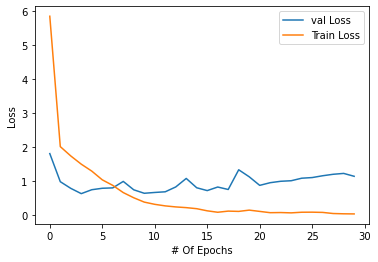

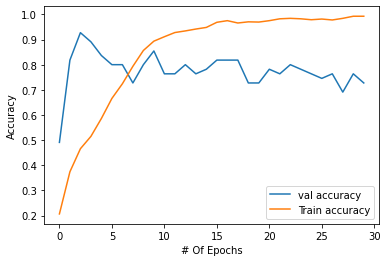

In [50]:
loss_training = history_vgg.history['loss']
loss_test = history_vgg.history['val_loss']

accuracy_training = history_vgg.history['accuracy']
accuracy_test = history_vgg.history['val_accuracy']

####################### Plotting
plt.plot(loss_test)
plt.plot(loss_training)
plt.xlabel("# Of Epochs")
plt.ylabel("Loss")
plt.legend(['val Loss', 'Train Loss'])
plt.show()

plt.plot(accuracy_test)
plt.plot(accuracy_training)
plt.xlabel("# Of Epochs")
plt.ylabel("Accuracy")
plt.legend(['val accuracy', 'Train accuracy'])
plt.show()

2/2 [==============================] - 6s 3s/step


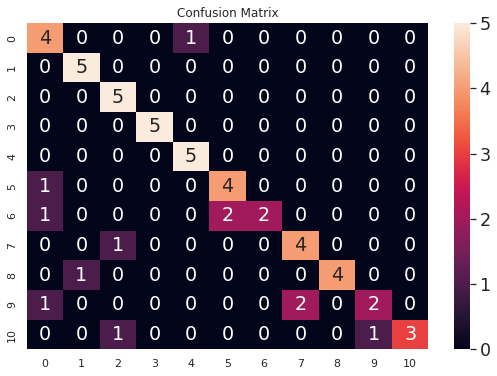

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.83      1.00      0.91         5
           2       0.71      1.00      0.83         5
           3       1.00      1.00      1.00         5
           4       0.83      1.00      0.91         5
           5       0.67      0.80      0.73         5
           6       1.00      0.40      0.57         5
           7       0.67      0.80      0.73         5
           8       1.00      0.80      0.89         5
           9       0.67      0.40      0.50         5
          10       1.00      0.60      0.75         5

    accuracy                           0.78        55
   macro avg       0.81      0.78      0.77        55
weighted avg       0.81      0.78      0.77        55



In [75]:
###Model1 Confusion matrix and classification report 
y_pred_vgg1= np.argmax(model_vgg.predict(resized_x_test), axis=1)
data= confusion_matrix(y_test, y_pred_vgg1)
plot_confusion_matrix(data)
print(classification_report(y_test, y_pred_vgg1))

In [55]:

### Another Model parameter To Prevent overfitting



In [56]:
vgg_architecture = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3),classes=11, pooling="avg")
for layer in vgg_architecture.layers:
    layer.trainable = False
    
vgg_model_2 = keras.models.Sequential()
vgg_model_2.add(vgg_architecture)
vgg_model_2.add(Flatten())

vgg_model_2.add(Dense(2048, activation='relu'))
vgg_model_2.add(BatchNormalization())
vgg_model_2.add(Dropout(0.5))

vgg_model_2.add(Dense(1024, activation='relu'))
vgg_model_2.add(BatchNormalization())
vgg_model_2.add(Dropout(0.3))

vgg_model_2.add(Dense(512, activation='relu'))
vgg_model_2.add(BatchNormalization())
vgg_model_2.add(Dropout(0.2))

vgg_model_2.add(Dense(11, activation='softmax'))


print(vgg_model_2.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 2048)              1050624   
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 1024)              2098176   
                                                      

In [57]:
vgg_model_2.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history_vgg2= vgg_model_2.fit(resized_x_train, y_train, epochs=30, batch_size = 64, validation_data=[resized_x_val, y_val])

loss_training = history_vgg2.history['loss']
loss_test = history_vgg2.history['val_loss']

accuracy_training = history_vgg2.history['accuracy']
accuracy_test = history_vgg2.history['val_accuracy']

Epoch 1/30
17/17 [==============================] - 133s 8s/step - loss: 2.7906 - accuracy: 0.2907 - val_loss: 1.6799 - val_accuracy: 0.6727
Epoch 2/30
17/17 [==============================] - 131s 8s/step - loss: 1.9460 - accuracy: 0.4444 - val_loss: 2.6966 - val_accuracy: 0.5636
Epoch 3/30
17/17 [==============================] - 131s 8s/step - loss: 1.6273 - accuracy: 0.4963 - val_loss: 1.1815 - val_accuracy: 0.7636
Epoch 4/30
17/17 [==============================] - 132s 8s/step - loss: 1.4294 - accuracy: 0.5750 - val_loss: 0.9454 - val_accuracy: 0.7455
Epoch 5/30
17/17 [==============================] - 132s 8s/step - loss: 1.2767 - accuracy: 0.6065 - val_loss: 0.6787 - val_accuracy: 0.8545
Epoch 6/30
17/17 [==============================] - 132s 8s/step - loss: 1.0987 - accuracy: 0.6704 - val_loss: 0.8164 - val_accuracy: 0.8364
Epoch 7/30
17/17 [==============================] - 132s 8s/step - loss: 1.0530 - accuracy: 0.6870 - val_loss: 0.5376 - val_accuracy: 0.8364
Epoch 8/30
17

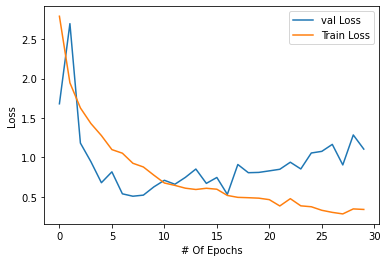

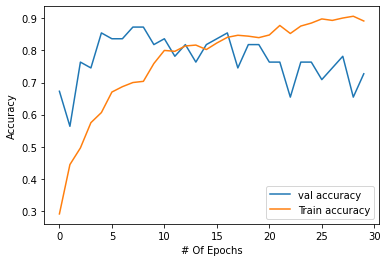

In [58]:
loss_training = history_vgg2.history['loss']
loss_test = history_vgg2.history['val_loss']

accuracy_training = history_vgg2.history['accuracy']
accuracy_test = history_vgg2.history['val_accuracy']

####################### Plotting
plt.plot(loss_test)
plt.plot(loss_training)
plt.xlabel("# Of Epochs")
plt.ylabel("Loss")
plt.legend(['val Loss', 'Train Loss'])
plt.show()

plt.plot(accuracy_test)
plt.plot(accuracy_training)
plt.xlabel("# Of Epochs")
plt.ylabel("Accuracy")
plt.legend(['val accuracy', 'Train accuracy'])
plt.show()

2/2 [==============================] - 6s 3s/step


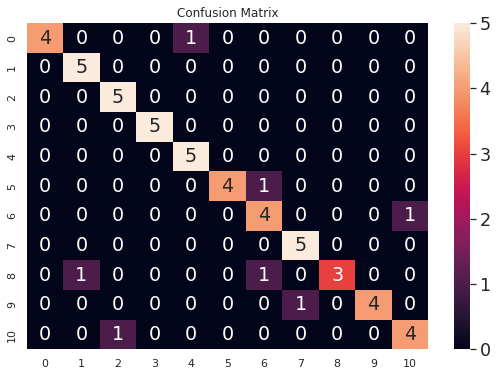

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         5
           4       0.83      1.00      0.91         5
           5       1.00      0.80      0.89         5
           6       0.67      0.80      0.73         5
           7       0.83      1.00      0.91         5
           8       1.00      0.60      0.75         5
           9       1.00      0.80      0.89         5
          10       0.80      0.80      0.80         5

    accuracy                           0.87        55
   macro avg       0.89      0.87      0.87        55
weighted avg       0.89      0.87      0.87        55



In [74]:
####Model2 Confusion matrix and classification report 
y_pred_vgg2= np.argmax(vgg_model_2.predict(resized_x_test), axis=1)
data= confusion_matrix(y_test, y_pred_vgg2)
plot_confusion_matrix(data)
print(classification_report(y_test, y_pred_vgg2))